# Mini Project2 - Shape Matching

Match the shape and label what shape it is

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Load image

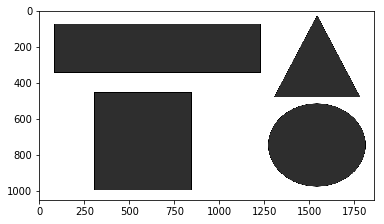

In [2]:
# img = cv2.imread("DATA/three_shapes.png", 0)
img = cv2.imread("DATA/shapes3.png", 0)

img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
plt.imshow(img, cmap = 'gray')

## Find Threshold

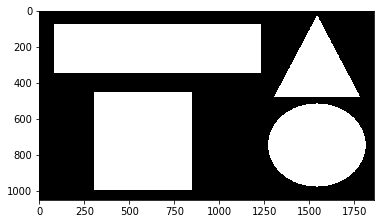

In [3]:
ret, thresh = cv2.threshold(img, 127,255,1)
plt.imshow(thresh, cmap = 'gray')

## Find Contour

In [4]:
image, contour, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

## Find approximate polygon

In [5]:
for c in contour:
    # get approximate polygon
    approx = cv2.approxPolyDP(c, 0.01 * cv2.arcLength(c, True), True)
    
    if len(approx) == 3: # triangle
        cv2.drawContours(img_color, [c], 0, (0,255,0), -1)
        
        # find contour center to put text
        M = cv2.moments(c)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(img_color, "Triangle", (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,0), 5)
    elif len(approx) == 4:
        x,y,w,h = cv2.boundingRect(c)
        M = cv2.moments(c)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        
        # check to see if it is square or rectangle
        if abs(w - h) <= 3: 
            cv2.drawContours(img_color, [c], 0, (0,125,255), -1)
            cv2.putText(img_color, "Square", (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,0), 5) 
        else:
            cv2.drawContours(img_color, [c], 0, (0,0,255), -1)
            cv2.putText(img_color, "Rectangle", (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,0), 5)  
    elif len(approx) >= 15:
        cv2.drawContours(img_color, [c], 0, (0,255,255), -1)
        M = cv2.moments(c)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(img_color, "Circle", (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,0), 5)  

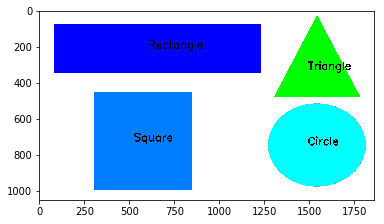

In [6]:
plt.imshow(img_color)